# Test

- does the environment work?
- are packages imported?
- can we access the data?
- how is the data structured?
- how to import files in an efficient way?
- how to save numpy arrays?
- how to access saved numpy arrays?

In [2]:
import xarray as xr
import pop_tools
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

print('yay all installed <3')

yay all installed <3


In [12]:
filename = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/temp_1001.001.nc'
ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:                 (moc_comp: 3, transport_comp: 5, transport_reg: 2,
                             z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             nlat: 384, nlon: 320, time: 3012, d2: 2)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 ...
    ULAT                    (nlat, nlon) float64 ...
    TLONG                   (nlat, nlon) float64 ...
    TLAT                    (nlat, nlon) float64 ...
  * time                    (time) object 1850-02-01 00:00:00 ... 2101-01-01 ...
Dimensions without coordinates: moc_comp, transport_comp, transport_reg, nlat,
                                nlon, d2
Data variables: (12/55)
    moc_components          (moc_comp) |S384 ...
    transport_components    (transport_comp) |S384 ...
    transport_regions       (transport_reg) |S384 ...
    dz                      (z_t) float32 ...
    dzw                     (z_w) float32 ...
    KMT                     (nlat, nlon) float64 ...
    ...                      ...
    salinity_factor         float64 ...
    sflux_factor            float64 ...
    nsurface_t              float64 ...
    nsurface_u              float64 ...
    time_bound              (time, d2) object ...
    TEMP                    (time, z_t, nlat, nlon) float32 ...
Attributes: (12/13)
    title:                     b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    history:                   Fri Dec 23 11:55:21 2022: ncrcat --no_tmp_fl /...
    Conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    time_period_freq:          month_1
    model_doi_url:             https://doi.org/10.5065/D67H1H0V
    contents:                  Diagnostic and Prognostic Variables
    ...                        ...
    revision:                  $Id$
    calendar:                  All years have exactly  365 days.
    start_time:                This dataset was created on 2020-01-31 at 16:3...
    cell_methods:              cell_methods = time: mean ==> the variable val...
    NCO:                       netCDF Operators version 4.7.4 (http://nco.sf....
    nco_openmp_thread_number:  1

In [11]:
ds.TEMP.shape

(3012, 60, 384, 320)

In [ ]:
filename = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/bsf/bsf_1001.001.nc'
ds_bsf = xr.open_dataset(filename)

print('look at my pretty data')

ds_bsf

In [7]:
time = ds_bsf.time.values

print(time)

[cftime.DatetimeNoLeap(1850, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 4, 1, 0, 0, 0, 0, has_year_zero=True) ...
 cftime.DatetimeNoLeap(2100, 11, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2100, 12, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2101, 1, 1, 0, 0, 0, 0, has_year_zero=True)]


In [3]:
path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc'
files = glob.glob(path + '/*.nc')

# loop through list of files
for f in files:
    
    # print files names
    print(f)
    
    # read in nc files
    #ds_moc = xr.open_dataset(f)

/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1231.019.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1301.017.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1231.012.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1251.007.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1231.017.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1301.016.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1301.006.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1251.003.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1281.010.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1231.013.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1281.013.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1281.007.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1301.015.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1251.004.nc
/Data/gfi/share/ModD

In [44]:
### INITIALISATION ###

import xarray as xr         # data handling
import glob                 # return all file paths that match a specific pattern
import ruptures as rpt      # for off-line change point detection

path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/'
files = glob.glob(path + '/*.nc')

# length of time series
len_time = 3012

# prepare arrays and dictionaries to store files
time_series = np.zeros((len_time, len(files)))
arrays_dict = {} # Create a dictionary to store the arrays

### COMPUTATION ###

# loop through list of files
for i in range(2):
    # read in files
    ds_moc = xr.open_dataset(files[i])
    
    # compute maximum moc time series
    ds_max = ds_moc.MOC.isel(transport_reg=1, 
                             lat_aux_grid=slice(259,365), 
                             moc_z=slice(27, 51)
                            ).sum('moc_comp').max(('lat_aux_grid','moc_z'))
    # return numpy series
    signal = ds_max.values
    
    # compute change points
    algo_window = rpt.Window(model="rbf").fit(signal) 
    result = algo_window.fit_predict(signal, pen=40)
    
    # save signal to time series array
    time_series[:,i] = signal

    # Add the arra to the dictionary with a unique key
    key = f"array_{i}"
    arrays_dict[key] = result
    
### OUTPUT ###
    
# Save time series to a single file
np.save("moc_time_series.npy", time_series)
# Save all change point arrays containing to a single file
np.savez("moc_change_points.npz", **arrays_dict)

In [3]:
# Load the array from the file
data = np.load("moc_time_series.npy")
# Access the array
data[:,0]

array([24.7646656 , 25.51775932, 29.96545982, ..., 10.13521862,
       11.90265274,  9.95957565])

In [5]:
# Load all the arrays from the file
data = np.load("moc_change_points.npz")

for i in range(10):
    key = f"array_{i}"
    array = data[key]
    
    # Do something with the array
    print(f"Array {i} has shape {array.shape}")

Array 0 has shape (4,)
Array 1 has shape (6,)
Array 2 has shape (2,)
Array 3 has shape (2,)
Array 4 has shape (3,)
Array 5 has shape (3,)
Array 6 has shape (3,)
Array 7 has shape (4,)
Array 8 has shape (4,)
Array 9 has shape (4,)


In [3]:

import xarray as xr         # data handling
import glob                 # return all file paths that match a specific pattern

path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/bsf/'
files = glob.glob(path + '*.nc')
for i in range(len(files)):
    
    # read in files
    ds = xr.open_dataset(files[i])
    
    print(ds.BSF)

<xarray.DataArray 'BSF' (time: 3012, nlat: 384, nlon: 320)>
[370114560 values with dtype=float32]
Coordinates:
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
  * time     (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Diagnostic barotropic streamfunction
    units:         Sv
    grid_loc:      2220
    cell_methods:  time: mean
<xarray.DataArray 'BSF' (time: 3012, nlat: 384, nlon: 320)>
[370114560 values with dtype=float32]
Coordinates:
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
  * time     (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Diagnostic barotropic streamfunction
    units:         Sv
    grid_loc

In [3]:
path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/vvel/'
salt_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/salt/'
temp_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/'
files = glob.glob(path + '*.nc')

In [11]:
glob.glob(salt_path + '*' + files[0][-11:])

['/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/salt/salt_1301.019.nc']

'1301.019.nc'

In [2]:
#!/usr/bin/env python3
# inagler 16/09/23

import numpy as np          # fundamental package for scientific computing
import xarray as xr
import pop_tools
import gsw                  # compute potential density

### INITIALISATION

path = '/home/innag3580/phase1_CONDA/'

# Load data events and their temporal location
data = np.genfromtxt(path+'current/events_dens_spg.csv', delimiter=',', names=True, dtype=None)

# Accessing columns by name
member_numbers = data['Index']
events = data['Values']
member_names = np.zeros(len(member_numbers))

# set periods
before = 40*12
after = 20*12


# find file names 
def find_corresponding_file_name(vvel_number_to_find):
    with open(path+'timeseries/order.txt', 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    vvel_filename = None
    for filename in vvel_list:
        if vvel_dict[filename.split()[1]] == vvel_number_to_find:
            vvel_filename = filename.split()[1]  
            break
    return vvel_filename

# set up regional mask
grid_name = 'POP_gx1v7'
region_defs = {
    'North Atlantic and Nordic Seas': [{'match': {'REGION_MASK': [6, 7, 9]}, 
                             'bounds': {'TLAT': [20., 78.]}}],
    'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}]
} 
mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic and Nordic Seas')
mask3d = mask3d.sum('region')

print('initialsation completed')
print('')







OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


initialsation completed



In [12]:
### COMPUTATION

for i in range(0, len(member_numbers)):

    # define entire time range for event
    member = find_corresponding_file_name(member_numbers[i])[5:]
    event = events[i]*12
    period_start = 0
    period_end = 24
    
    print('computation member '+member+' started')

    # select time range in data arrays
    time = slice(period_start, period_end)
    
    n_heat_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/n_heat/n_heat_'+member
    ds_n_heat = xr.open_dataset(n_heat_file).isel(time=time).resample(time='A').mean(dim='time')
    
    print('N_HEAT file loaded')


computation member 1301.019.nc started
N_HEAT file loaded
computation member 1231.001.nc started
N_HEAT file loaded
computation member 1281.012.nc started
N_HEAT file loaded
computation member 1301.001.nc started
N_HEAT file loaded
computation member 1281.017.nc started
N_HEAT file loaded
computation member 1231.020.nc started
N_HEAT file loaded
computation member 1231.004.nc started
N_HEAT file loaded
computation member 1281.010.nc started
N_HEAT file loaded
computation member 1281.020.nc started
N_HEAT file loaded
computation member 1301.015.nc started
N_HEAT file loaded
computation member 1281.015.nc started
N_HEAT file loaded
computation member 1231.003.nc started
N_HEAT file loaded
computation member 1251.010.nc started
N_HEAT file loaded


In [6]:
ds_aice_march

<xarray.Dataset>
Dimensions:      (nj: 384, ni: 320, nc: 5, nkice: 8, nksnow: 3, nkbio: 5,
                  nvertices: 4, time: 2, d2: 2)
Coordinates:
    TLON         (nj, ni) float32 ...
    TLAT         (nj, ni) float32 ...
    ULON         (nj, ni) float32 ...
    ULAT         (nj, ni) float32 ...
  * time         (time) object 1850-03-01 00:00:00 1851-03-01 00:00:00
Dimensions without coordinates: nj, ni, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/21)
    NCAT         (nc) float32 ...
    VGRDi        (nkice) float32 ...
    VGRDs        (nksnow) float32 ...
    VGRDb        (nkbio) float32 ...
    tmask        (nj, ni) float32 ...
    tarea        (nj, ni) float32 ...
    ...           ...
    lont_bounds  (nj, ni, nvertices) float32 ...
    latt_bounds  (nj, ni, nvertices) float32 ...
    lonu_bounds  (nj, ni, nvertices) float32 ...
    latu_bounds  (nj, ni, nvertices) float32 ...
    time_bounds  (time, d2) object ...
    aice         (time, nj, ni) float32 ...
Attributes: (12/13)
    title:                     b.e21.BHISTcmip6.f09_g17.LE2-1251.010
    contents:                  Diagnostic and Prognostic Variables
    source:                    Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:          month_1
    model_doi_url:             https://doi.org/10.5065/D67H1H0V
    comment:                   All years have exactly 365 days
    ...                        ...
    comment3:                  seconds elapsed into model date:      0
    conventions:               CF-1.0
    history:                   Mon Jan 22 10:43:09 2024: ncrcat --no_tmp_fl /...
    io_flavor:                 io_pio
    NCO:                       netCDF Operators version 4.7.4 (http://nco.sf....
    nco_openmp_thread_number:  1

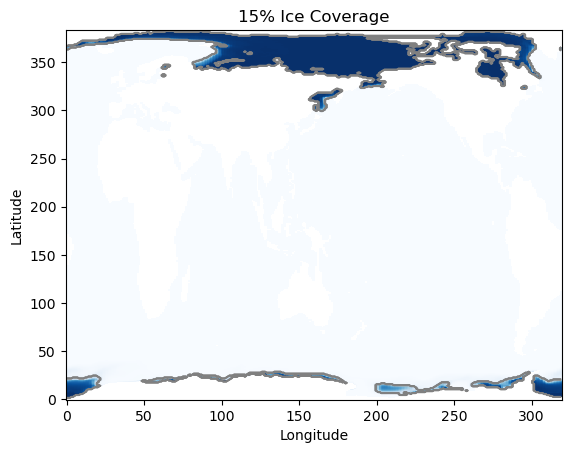

In [9]:
# Assuming ds is your xarray dataset
ice_area = ds_aice_march.aice.isel(time=0)  # Adjust the variable name accordingly
time_index = 0  # Adjust the time index as needed

# Create a binary mask where True indicates values greater than or equal to 0.15
mask = ice_area >= 0.15

# Plot the map with the 15% ice coverage indicated by a line
fig, ax = plt.subplots()
ice_area.plot(ax=ax, cmap='Blues', add_colorbar=False)
mask.plot.contour(ax=ax, colors=['gray'], linewidths=1)

plt.title(f'15% Ice Coverage')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [9]:
vvel_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/VVELcomposite.nc'
sigma_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/SIGMA_2composite.nc'


labels = [r'Barotropic Streamfunction Anomaly $\Delta BSF$ [Sverdrup]', r'Depth Streamfunction Anomaly $Delta dMOC$ [Sverdrup]', 
          r'Desnity Streamfunction Anomaly $\Delta \sigma MOC$ [Sverdrup]']

print('initialisation complete')

### COMPUTATION

vvel_ds = xr.open_dataset(vvel_file)
sigma_ds = xr.open_dataset(sigma_file)

initialisation complete


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [4]:
vvel_ds

<xarray.Dataset>
Dimensions:  (z_t: 60, nlat: 384, nlon: 320, time: 60)
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon, time
Data variables:
    VVEL     (time, z_t, nlat, nlon) float32 ...

In [1]:
import os                   # to interact with the operating system
import glob

import numpy as np
import pandas as pd
import xarray as xr

import pop_tools
import gsw                  # compute potential density

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cmocean.cm as cmo
import matplotlib.ticker as ticker

from matplotlib import animation, gridspec

print('packages check')

### INITIALISATION

vvel_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/VVELcomposite.nc'
sigma_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/SIGMA_2composite.nc'


labels = [r'Barotropic Streamfunction Anomaly $\Delta BSF$ [Sverdrup]', 
          r'Depth Streamfunction Anomaly $\Delta dMOC$ [Sverdrup]', 
          r'Density Streamfunction Anomaly $\Delta \sigma MOC$ [Sverdrup]']
cmap = cmo.balance

print('initialisation complete')

### COMPUTATION

vvel_ds = xr.open_dataset(vvel_file).isel(time=slice(0,3))
sigma_ds = xr.open_dataset(sigma_file).isel(time=slice(0,3))
dens_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1231.001.nc'
ds = xr.open_dataset(dens_file).isel(time=0)

print('composite nc files have been opened')


packages check
initialisation complete
composite nc files have been opened


In [2]:
ds = xr.open_dataset(dens_file).isel(time=0)ac

In [3]:
## stream functions
def BSF(ds, ds_parameters):
    bsf = []
    for time_idx in range(len(ds.time)):
        ds_time_step = ds.isel(time=time_idx)
        bsf_time_step = (ds_time_step.VVEL * ds_parameters.dz * ds_parameters.DXU).sum(dim='z_t').cumsum(dim='nlon')
        bsf.append(bsf_time_step)
    bsf_ds = xr.concat(bsf, dim='time')
    return bsf_ds*1e-12

def depth_MOC(ds, ds_parameters):
    dmoc = []
    for time_idx in range(len(ds.time)):
        ds_time_step = ds.isel(time=time_idx)
        dmoc_time_step = (ds_time_step.VVEL * ds_parameters.dz * ds_parameters.DXU).sum(dim='nlon').cumsum(dim='z_t')
        dmoc.append(dmoc_time_step)
    dmoc_ds = xr.concat(dmoc, dim='time')
    return dmoc_ds*1e-12

def density_MOC(ds_vvel, ds_sigma, ds_parameters):
    sigma_level = [12., 16., 20., 24., 28., 28.5, 29.2, 29.4, 29.6, 29.8, 30., 30.2, 30.4, 30.6,
                   30.8, 31., 31.2, 31.4, 31.6, 31.8, 32., 32.2, 32.4, 32.6, 32.8, 33., 33.2, 33.4,
                   33.6, 33.8, 34., 34.2, 34.4, 34.6, 34.8, 35., 35.2, 35.4, 35.6, 35.8, 36.1, 36.2,
                   36.3, 36.4, 36.55, 36.6, 36.65, 36.7, 36.72, 36.74, 36.76, 36.78, 36.8, 36.82,
                   36.84, 36.86, 36.88, 36.9, 36.92, 36.94, 36.96, 36.98, 37., 37.02, 37.04, 37.06,
                   37.08, 37.1, 37.12, 37.14, 37.16, 37.18, 37.2, 37.25, 37.3, 37.35, 37.4, 37.45,
                   37.6, 37.7, 37.8, 37.9, 38., 39., 40., 41., 42.]
    min_lat = 250
    max_lat = 360
    smoc = []
    for time_idx in range(len(ds_vvel.time)):
        ds_vvel_time_step = ds_vvel.isel(time=time_idx)
        ds_sigma_time_step = ds_sigma.isel(time=time_idx)
        overturning = np.zeros([len(sigma_level), (max_lat - min_lat)])
        for j in range(min_lat, max_lat):
            sigma_transport = np.zeros(len(sigma_level))
            v_transport = (ds_vvel_time_step.VVEL.isel(nlat=j) * ds_parameters.dz.isel(nlat=j) * ds_parameters.DXU.isel(nlat=j)).values
            sigma_crossection = ds_sigma_time_step.SIGMA_2.isel(nlat=j).values
            for i in range(len(sigma_level) - 1):
                ind = np.where((sigma_crossection >= sigma_level[i]) & (sigma_crossection < sigma_level[i + 1]))
                sigma_transport[i] = np.nansum(v_transport[ind])
            overturning[:, j - min_lat] = np.cumsum(sigma_transport)[::-1]
            overturning[:, j - min_lat] = overturning[:, j - min_lat][::-1]
        overturning_ds = xr.Dataset({'densMOC': (['sigma', 'nlat'], overturning)})
        overturning_ds['densMOC'] = overturning_ds.densMOC*1e-14
        overturning_ds['sigma'] = sigma_level
        overturning_ds['nlat'] = ds_parameters.nlat.isel(nlat=slice(min_lat, max_lat))
        smoc.append(overturning_ds)
    smoc_ds = xr.concat(smoc, dim='time')
    return smoc_ds

bsf_ds = BSF(vvel_ds, ds)
print('BSF composite computed')
bsf_ds.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/BSFcomposite.nc')
print('BSF composite nc file has been saved')
print('')
dmoc_ds = depth_MOC(vvel_ds, ds)
print('dMOC composite computed')
dmoc_ds.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/dMOCcomposite.nc')
print('dMOC composite nc file has been saved')
print('')
smoc_ds = density_MOC(vvel_ds, sigma_ds, ds)
print('sMOC composite computed')
smoc_ds.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/sMOCcomposite.nc')
print('sMOC composite nc file has been saved')
print('')

streamfunctions = [bsf_ds, dmoc_ds, smoc_ds.densMOC]
var = ['BSF', 'dMOC', 'sMOC']

BSF composite computed
BSF composite nc file has been saved

dMOC composite computed
dMOC composite nc file has been saved

sMOC composite computed
sMOC composite nc file has been saved



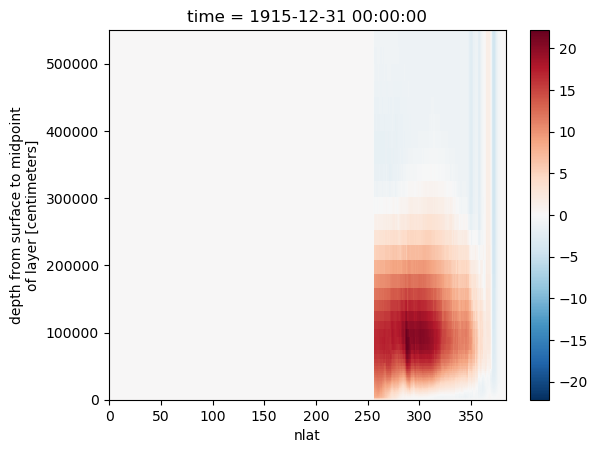

In [4]:
streamfunctions[1].isel(time=0).plot()

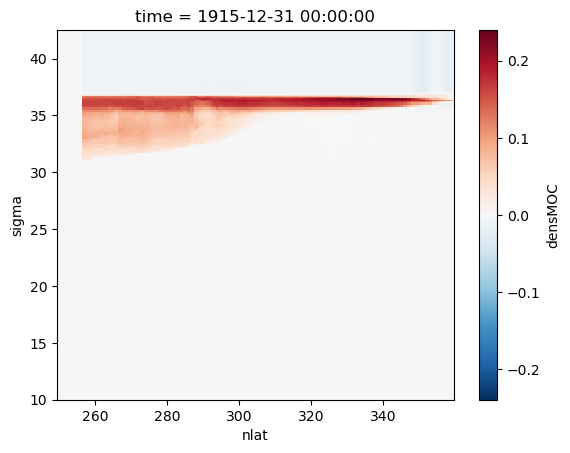

In [5]:
streamfunctions[2].isel(time=0).plot()

dMOC animation has been saved
sMOC animation has been saved


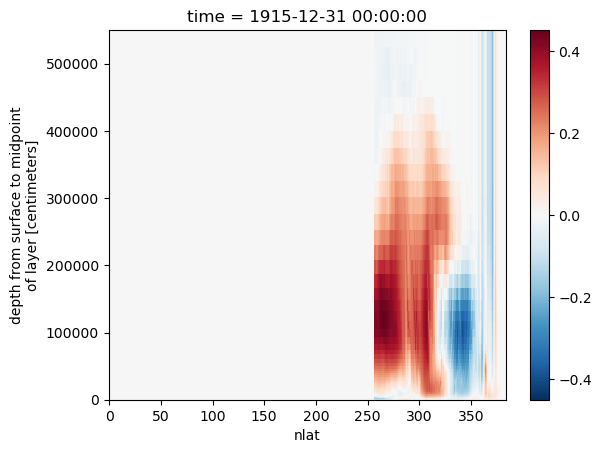

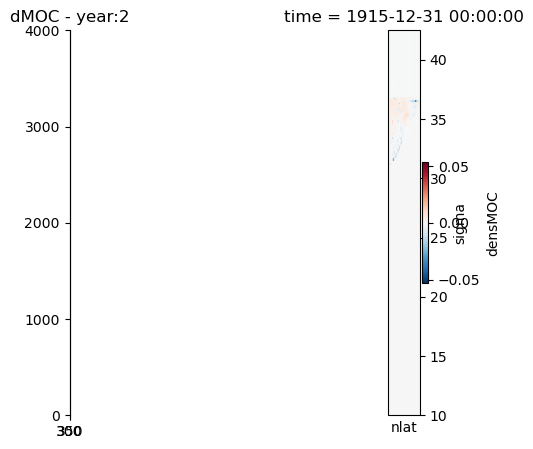

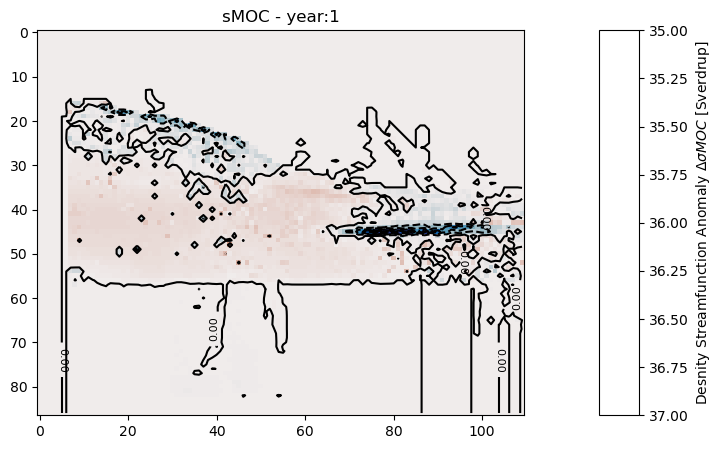

In [6]:
def plot_var_frame(time_step, k):
    data = ds.isel(time=start + time_step)
    ax1.cla()
    im = ax1.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax) 
    contour = ax1.contour(data, colors='k')
    ax1.clabel(contour, inline=True, fontsize=8)
    
    if k == 0:
        ax1.set_xlim([170, 310])
        ax1.set_ylim([250, 382])
    elif k == 1:
        
        ax1.set_ylim([0, 400000])
        
        current_y_ticks = ax1.get_yticks()
        new_y_ticks = np.array(current_y_ticks)[::2] 
        new_y_tick_labels = ['{:g}'.format(float(tick) * 1e-2) for tick in new_y_ticks]
        ax1.set_yticks(new_y_ticks)
        ax1.set_yticklabels(new_y_tick_labels)
        
        ax1.set_xlim([260, 360])
        
    elif k == 2:
        plt.xlim([260, 360])
        plt.ylim(37, 35)
        
    ax1.set_title(var[k]+f' - year:{1+time_step}')
    
for k in range(1,3):    

    ds_var_annual = streamfunctions[k]
    ds = ds_var_annual - ds_var_annual.isel(time=0)
    vmin, vmax = -abs(ds).max(), abs(ds).max()
    start = 1
    
    ds.isel(time=1).plot()

    # create figure and set up layout of subplots
    fig = plt.figure(figsize=(8, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[13, 1])

    # main subplot for animation
    ax1 = plt.subplot(gs[0])

    # Acolorbar subplot 
    cax = plt.subplot(gs[1])
    num_time_steps = 2
    ani = animation.FuncAnimation(fig, plot_var_frame, frames=num_time_steps, fargs=(k,), interval=800)

    # set colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label(labels[k])

    # Save animation
    ani.save(os.path.expanduser('~/phase1_CONDA/results/') + var[k] + 'annual_anomaly.gif', writer='pillow', fps=3)

    print(var[k]+' animation has been saved')

IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x7f31f5519c60> (for post_execute):


TypeError: plot_var_frame() missing 1 required positional argument: 'k'

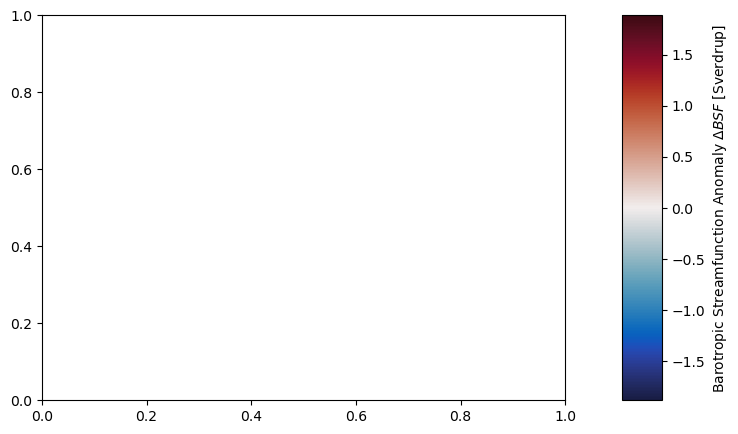

In [7]:
## make animation
    
def plot_var_frame(time_step, k):
    data = ds.isel(time=start + time_step)
    ax1.cla()
    im = ax1.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax) 
    contour = ax1.contour(data, colors='k')
    ax1.clabel(contour, inline=True, fontsize=14)
    ax1.set_xlim([170, 310])
    ax1.set_ylim([250, 382])
    ax1.set_title(var[k]+f' - year:{1+time_step}')
    
for k in range(3):    

    ds_var_annual = streamfunctions[k]
    ds = ds_var_annual - ds_var_annual.isel(time=0)
    vmin, vmax = -abs(ds).max(), abs(ds).max()
    start = 1

    # create figure and set up layout of subplots
    fig = plt.figure(figsize=(8, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[13, 1])

    # main subplot for animation
    ax1 = plt.subplot(gs[0])

    # Acolorbar subplot 
    cax = plt.subplot(gs[1])
    num_time_steps = 59
    ani = animation.FuncAnimation(fig, plot_var_frame, frames=num_time_steps, interval=800)

    # set colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label(labels[k])

    # Save animation
    ani.save(os.path.expanduser('~/phase1_CONDA/results/') + var[k] + 'annual_anomaly.gif', writer='pillow', fps=3)

    print(var[k]+' animation has been saved')

    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

    # Set common xlim and ylim for all plots
    common_xlim = (180, 310)
    common_ylim = (250, 380)

    # Loop through the subplots and plot the data
    for i, ax in enumerate(axes.flatten()):
        # Plot data without colorbar
        plot = ds.isel(time=range(i * 5, i * 5 + 5)).mean('time').plot(ax=ax, add_colorbar=False, vmin=vmin, vmax=vmax, cmap=cmap)
        ax.set_axis_off()

        # Set xlim and ylim
        ax.set_xlim(common_xlim)
        ax.set_ylim(common_ylim)

        ax.set_title(f" {i+1}")

    # Add a single colorbar for all plots outside the loop
    cbar = fig.colorbar(plot, ax=axes, orientation='vertical', label=labels[v])

    fig.suptitle(var[k]+' -  5 year Anomalies', fontsize=16)

    plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+var[k]+'_5year_anomalies.png', bbox_inches='tight', dpi=300)


print(var[k]+' figure has been plotted')

    
print('this adventure is completed!')






In [17]:
#!/usr/bin/env python3
# inagler 12/04/24

import os                   # to interact with the operating system
import glob

import numpy as np
import pandas as pd
import xarray as xr

import pop_tools            # to mask region of interest
import gsw                  # compute potential density

# set up regional mask
grid_name = 'POP_gx1v7'
region_defs = {
    'North Atlantic and Nordic Seas': [{'match': {'REGION_MASK': [6, 7, 9]}, 'bounds': {'TLAT': [20., 78.]}}],
    'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}]} 
mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic and Nordic Seas')
mask3d = mask3d.sum('region')

# set time range to historical period
hist_period = (2014-1850)*12
time = slice(0, hist_period)

path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/'

## stream functions
def BSF(ds, ds_parameters):
    bsf_ds = (ds.VVEL * ds_parameters.dz * ds_parameters.DXU).sum(dim='z_t').cumsum(dim='nlon')
    return bsf_ds*1e-12

def depth_MOC(ds, ds_parameters):
    dmoc_ds = (ds.VVEL * ds_parameters.dz * ds_parameters.DXU).sum(dim='nlon').cumsum(dim='z_t')
    return dmoc_ds*1e-12

def density_MOC(ds_vvel, ds_sigma, ds_parameters):
    sigma_level = [12., 16., 20., 24., 28., 28.5, 29.2, 29.4, 29.6, 29.8, 30., 30.2, 30.4, 30.6, 30.8, 31., 31.2, 31.4, 31.6, 31.8, 32., 32.2, 32.4, 32.6, 32.8, 33., 33.2, 33.4,
                   33.6, 33.8, 34., 34.2, 34.4, 34.6, 34.8, 35., 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36, 36.1, 36.15, 36.2, 36.25, 36.3, 36.35, 
                   36.4, 36.42, 36.44, 36.46, 36.48, 36.5, 36.52, 36.54, 36.56, 36.57, 
                   36.58, 36.59, 36.6, 36.61, 36.62, 36.63, 36.64, 36.65, 36.66, 36.67, 36.68, 36.69, 36.7, 36.71, 36.72, 36.73, 36.74, 36.75, 36.76, 
                   36.78, 36.8, 36.82, 36.84, 36.86, 36.88, 36.9, 36.92, 36.94, 36.96, 36.98, 37., 37.02, 37.04, 37.06, 37.08, 37.1, 37.12, 
                   37.14, 37.16, 37.18, 37.2, 37.25, 37.3, 37.35, 37.4, 37.45, 37.6, 37.7, 37.8, 37.9, 38., 39., 40., 41., 42.]
    min_lat = 250
    max_lat = 365
    overturning = np.zeros([len(sigma_level), (max_lat - min_lat)])
    for j in range(min_lat, max_lat):
        sigma_transport = np.zeros(len(sigma_level))
        v_transport = (ds_vvel.isel(nlat=j) * ds_parameters.dz.isel(nlat=j) * ds_parameters.DXU.isel(nlat=j)).values
        sigma_crossection = ds_sigma.isel(nlat=j).values
        for i in range(len(sigma_level) - 1):
            ind = np.where((sigma_crossection >= sigma_level[i]) & (sigma_crossection < sigma_level[i + 1]))
            sigma_transport[i] = np.nansum(v_transport[ind])
        overturning[:, j - min_lat] = np.cumsum(sigma_transport)[::-1]
        overturning[:, j - min_lat] = overturning[:, j - min_lat][::-1]
    overturning_ds = xr.Dataset({'densMOC': (['sigma', 'nlat'], overturning)})
    overturning_ds['densMOC'] = overturning_ds.densMOC*1e-12
    overturning_ds['sigma'] = sigma_level
    overturning_ds['nlat'] = ds_parameters.nlat.isel(nlat=slice(min_lat, max_lat))
    return overturning_ds.densMOC


In [18]:
### COMPUTATION

# prepare parameter ds
dens_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composite_1231.001.nc'
ds = xr.open_dataset(dens_file).isel(time=0)

files = sorted(glob.glob(path + 'vvel/*.nc'))

bsf_collect = []
dmoc_collect = []
smoc_collect = []

# open file
for i in range(2):#len(files)):
    print('file '+str(i)+' started')
    print('')
    
    # load vvel file
    ds_vvel = xr.open_dataset(files[i]).isel(time=slice(0,3))#time)
    ds_vvel = ds_vvel.where(mask3d == 1)
    ds_vvel = ds_vvel.mean('time')
    
    # load temp ds
    ds_temp = xr.open_dataset(path+'temp/temp_'+files[i][-11:]).isel(time=slice(0,3))#time)
    ds_temp = ds_temp.where(mask3d == 1)
    ds_temp = ds_temp.mean('time')
    
    # load salt ds
    ds_salt = xr.open_dataset(path+'salt/salt_'+files[i][-11:]).isel(time=slice(0,3))#time)
    ds_salt = ds_salt.where(mask3d == 1)
    ds_salt = ds_salt.mean('time')
    
    # compute sigma ds
    CT = gsw.conversions.CT_from_pt(ds_salt.SALT, ds_temp.TEMP)
    ds_vvel['SIGMA_2'] = gsw.density.sigma2(ds_salt.SALT, CT)
    
    # compute bsf
    bsf_ds = BSF(ds_vvel, ds)
    
    # compute dmoc
    dmoc_ds = depth_MOC(ds_vvel, ds)
    
    # compute smoc
    smoc_ds = density_MOC(ds_vvel.VVEL, ds_vvel.SIGMA_2, ds)
    
    # store
    bsf_collect.append(bsf_ds)
    dmoc_collect.append(dmoc_ds)
    smoc_collect.append(smoc_ds)
    print('file '+str(i)+' computation completed')
    
    
bsf_fields = xr.concat(bsf_collect, dim='fields')
dmoc_fields = xr.concat(dmoc_collect, dim='fields')    
smoc_fields = xr.concat(smoc_collect, dim='fields')  

print('fields concatenated')

i=0
var=['bsf', 'dmoc', 'smoc']
for stacked_fields in (bsf_fields, dmoc_fields, smoc_fields):

    # compute mean between all members per location
    mean_values = stacked_fields.mean(dim='fields')

    # compute standard deviation between all members per location
    std_values = stacked_fields.std(dim='fields')

    # save field
    # Create a new dataset to store the mean and standard deviation values together
    combined_dataset = xr.Dataset({'mean_values': mean_values, 'std_values': std_values})

    # Save the dataset to a NetCDF file
    combined_dataset.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/'+var[i]+'_mean_std.nc')
    
    print(var[i] + ' saving  completed')
    
    i=i+1



file 0 started

file 0 computation completed
file 1 started

file 1 computation completed
fields concatenated
bsf saving  completed
dmoc saving  completed
smoc saving  completed


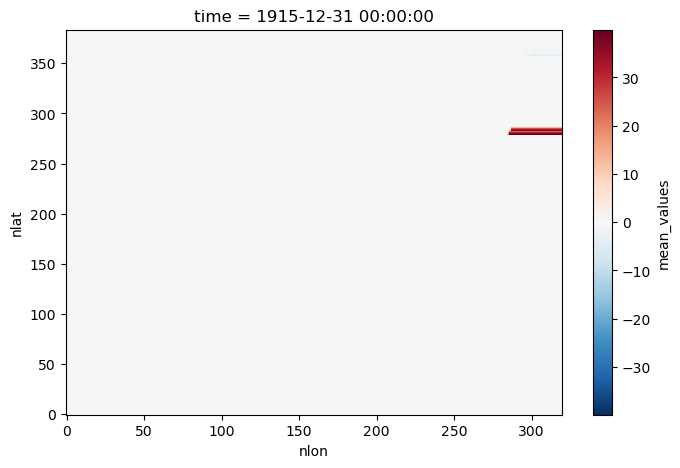

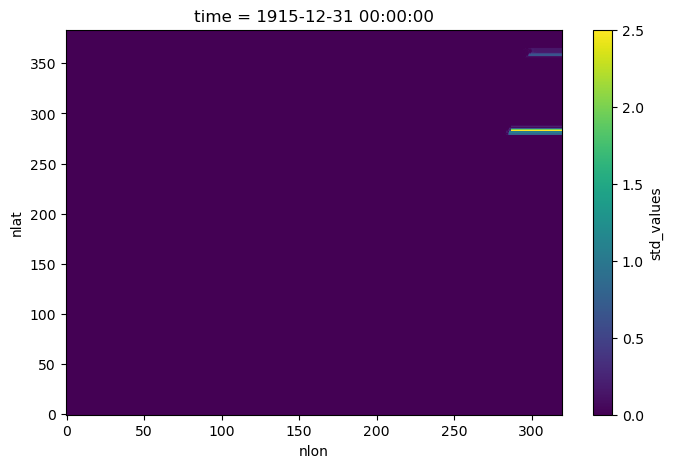

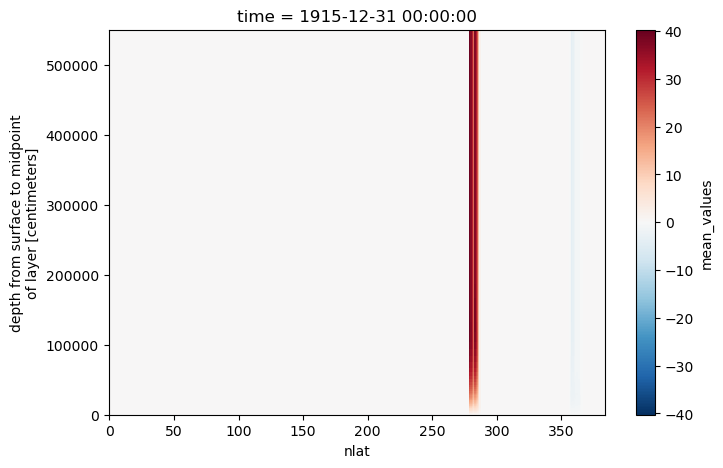

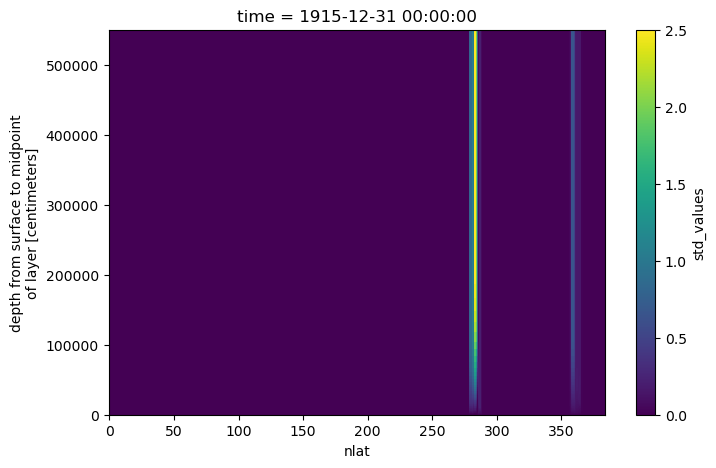

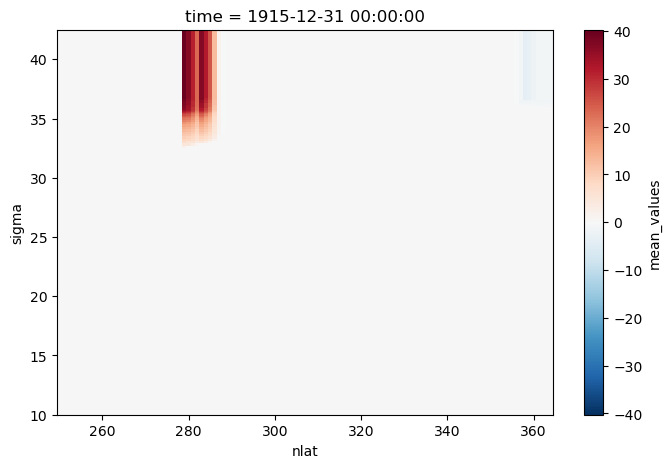

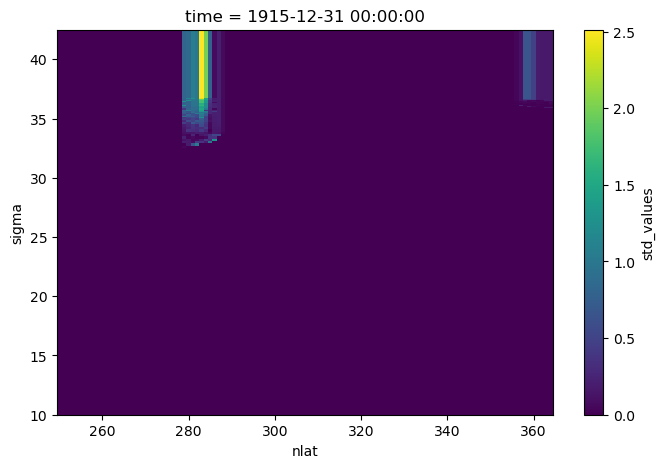

In [19]:
import matplotlib.pyplot as plt
for v in var:
    ds=xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/composites/'+v+'_mean_std.nc')
    
    plt.figure(figsize=(8, 5))
    ds.mean_values.plot()
    plt.show()
    
    plt.figure(figsize=(8, 5))
    ds.std_values.plot()
    plt.show()

In [3]:
import xarray as xr
import pop_tools
import glob

# Define paths
base_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/'
output_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/'

# Function to compute anomalies
def compute_anomalies(var_name):
    # Obtain list of files for the variable
    files_list = sorted(glob.glob(f'{base_path}{var_name}/{var_name}_*.nc'))[:3]
    
    # Process files individually
    period1_averages = []
    period2_averages = []

    for f in files_list:
        ds = xr.open_dataset(f)
        
        # Select periods and apply the mask from 1 file to avoid dimensionality mismatch
        ds_p1 = ds.sel(time=slice('1850-01', '1875-12'))
        ds_p2 = ds.sel(time=slice('1975-01', '2000-12'))
        
        # Load and apply regional mask
        grid_name = 'POP_gx1v7'
        region_defs = {
        'North Atlantic and Nordic Seas': [{'match': {'REGION_MASK': [6, 7, 9]}, 'bounds': {'TLAT': [20., 78.]}}],
        'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}]}
        mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic and Nordic Seas')
        mask3d = mask3d.sum('region')

        ds_p1_masked = ds_p1.where(mask3d)
        ds_p2_masked = ds_p2.where(mask3d)
        
        # Calculate means for each period
        period1_mean = ds_p1_masked.mean(['time'])
        period2_mean = ds_p2_masked.mean(['time'])
        
        # Store results
        period1_averages.append(period1_mean)
        period2_averages.append(period2_mean)
    
    # Concatenate and average results across all files
    final_p1_avg = xr.concat(period1_averages, dim='file').mean('file')
    final_p2_avg = xr.concat(period2_averages, dim='file').mean('file')
    
    # Compute anomaly
    anomaly = final_p2_avg - final_p1_avg
    
    # Save the results
    output_file = f'{output_path}{var_name}_anomaly.nc'
    anomaly.to_netcdf(output_file)
    print(f"Composite anomaly for {var_name} saved to {output_file}")

# Process each variable
compute_anomalies('temp')
#compute_anomalies('salt')
#compute_anomalies('shf')

print("Processing complete.")

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Composite anomaly for temp saved to /Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/temp_anomaly.nc
Processing complete.


In [5]:
final_p2_avg

NameError: name 'final_p2_avg' is not defined

In [ ]:
ds_temp_anom.TEMP.sel(z_t=slice(5.0000000e+02, 1.050000e+04)).mean('z_t').plot(vmin = -0.8, vmax = 0.8, cmap=cmo.balance)
plt.xlim(150, 320)
plt.ylim(250, 385)